In [1]:
import numpy as np
from MERA_utilities import *
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from scipy.signal import convolve2d

In [2]:
L_list = [64]
l_list = [2,3,4, 5]
W_list = [0.0001] + list(range(1,11))
num_dis = 100
num_energies = 11

In [3]:
all_data = load_all_data(L_list, l_list, W_list, num_dis, num_energies)

L = 16, l = 2


/home/abid/Dropbox/Development/programs/MERA/analysis/MERA_utilities.py:68: RuntimeWarning: invalid value encountered in log10
  np.array([E, var, np.log10(var), EE, r, Sz, ep_mera, \
/home/abid/Dropbox/Development/programs/MERA/analysis/MERA_utilities.py:68: RuntimeWarning: divide by zero encountered in log10
  np.array([E, var, np.log10(var), EE, r, Sz, ep_mera, \


L = 16, l = 3
L = 16, l = 4
L = 16, l = 5
L = 32, l = 2
L = 32, l = 3
L = 32, l = 4
L = 32, l = 5
L = 64, l = 2
L = 64, l = 3
L = 64, l = 4
L = 64, l = 5


<IPython.core.display.Javascript object>


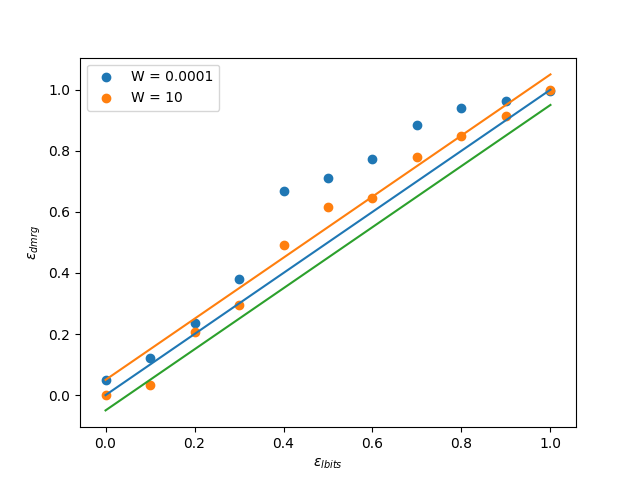

In [5]:
%matplotlib notebook

L_idx, l_idx, dis = 1, 3, 7
for W_idx in [0, 10]:
    W = W_list[W_idx]
    d = all_data[L_idx,l_idx,W_idx,dis,:,:]
    d = get_lists(flatten_data(d))
    plt.scatter(d[EP_IDX], d[EP_DMRG_IDX], label="W = {}".format(W))
plt.plot(d[EP_IDX], d[EP_IDX])
plt.plot(d[EP_IDX], d[EP_IDX]+.05)
plt.plot(d[EP_IDX], d[EP_IDX]-.05)

plt.legend(loc='best')
plt.xlabel(r"$\epsilon_{lbits}$")
plt.ylabel(r"$\epsilon_{dmrg}$")
plt.show()

    

<IPython.core.display.Javascript object>


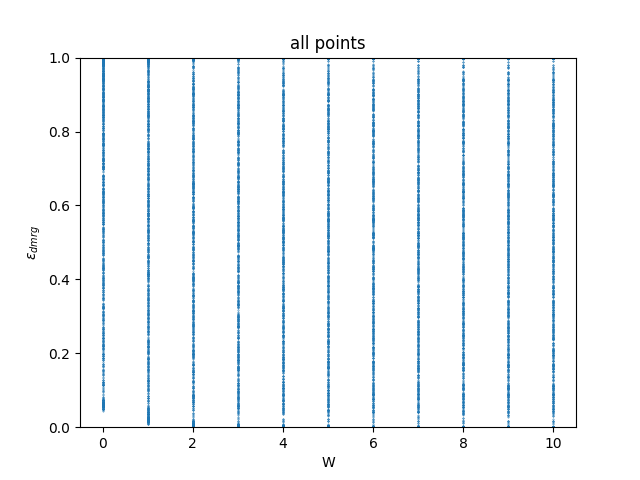

In [20]:
%matplotlib notebook
L_idx, l_idx = 1, 3

d = all_data[L_idx,l_idx,:,:,:,:]
d = get_lists(flatten_data(d))
plt.scatter(d[W_IDX], d[EP_DMRG_IDX], s=.1)

plt.xlabel("W")
plt.ylabel(r"$\epsilon_{dmrg}$")
plt.title("all points")
plt.ylim(0,1)
plt.show()


From the above plot, it's clear that the ratio of H/L lbits isn't exactly correlated to the energy level

Below we plot the average log variance for a given W and epsilon as a function of L for various l

<IPython.core.display.Javascript object>


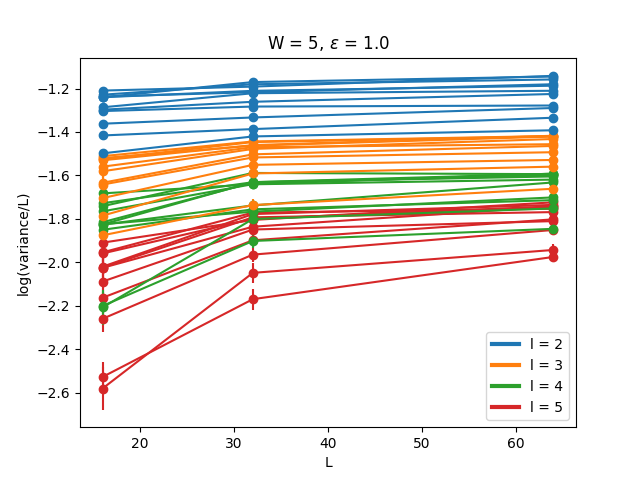

In [14]:
%matplotlib notebook
W_idx = 5
for ep in np.arange(11)/10:
    W = W_list[W_idx]
    for l_idx, l in enumerate(l_list):
        l_arr = all_data[:,l_idx,W_idx,:,:,:]
        logvar_list = []
        std_list = []
        for L_idx, L in enumerate(L_list):
            L_arr = flatten_data(l_arr[L_idx,:,:,:])
            logvars = get_lists(np.array(get_ep_data(L_arr, ep)))[LOGVAR_IDX]
            logvar_list.append(np.mean(logvars)-np.log10(L))
            std_list.append(np.std(logvars)/np.sqrt(len(logvars)))

        plt.errorbar(L_list, logvar_list, std_list, fmt='C{}o-'.format(l_idx),label="l = {}".format(l))
plt.title(r"W = {}, $\epsilon$ = {}".format(W, ep))
plt.xlabel("L")
plt.ylabel("log(variance/L)")
#plt.legend(loc='best')

from matplotlib.lines import Line2D
lines = [Line2D([0], [0], color="C{}".format(l_idx), linewidth=3, linestyle='-') for l_idx in range(len(l_list))]
labels = ['l = {}'.format(l) for l in l_list]
plt.legend(lines, labels)
plt.show()
        
        

<IPython.core.display.Javascript object>


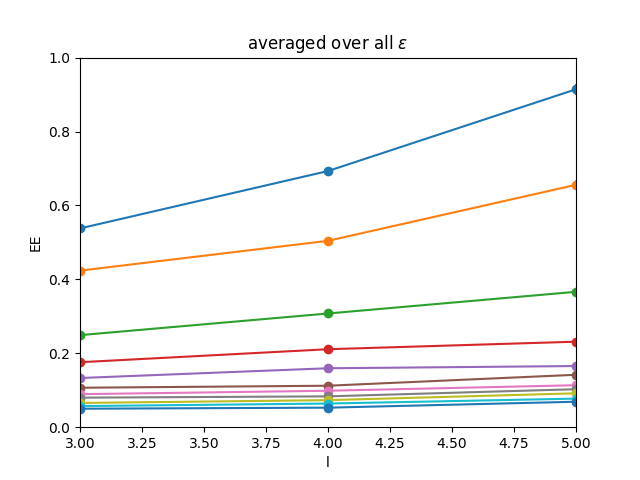

In [26]:
%matplotlib notebook
for W_idx, W in enumerate(W_list):
    ep, L_idx = .5, 1
    L_arr = all_data[L_idx,:,W_idx,:,:,:]
    EE_list = []
    std_list = []
    for l_idx, l in enumerate(l_list):
        l_arr = flatten_data(L_arr[l_idx,:,:])
        EEs = get_lists(np.array(get_ep_data(l_arr, ep, tol=.5)))[EE_IDX]
        EE_list.append(np.mean(EEs))
        std_list.append(np.std(EEs)/np.sqrt(len(EEs)))

    plt.errorbar(l_list, EE_list, std_list, fmt='o-', label="W = {}".format(W))
plt.title(r"averaged over all $\epsilon$".format(W))
plt.xlabel("l")
plt.ylabel("EE")
#plt.legend(loc='best')
plt.xlim(3,5)
plt.ylim(0,1)
plt.savefig("EEvl_L_{}.png".format(L_list[L_idx]))
plt.show()

[2, 3, 4, 5]
[0.39274910543240327, 0.5378211315820015, 0.6930884541713728, 0.9142904074677274]
0.1719891228695343


<IPython.core.display.Javascript object>


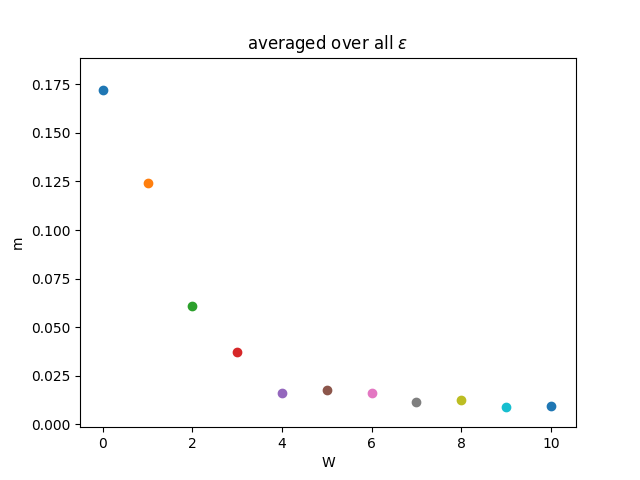

[2, 3, 4, 5]
[0.268976388566123, 0.42365460691473633, 0.5042730996577273, 0.6557923363783635]
0.12410663361797115
[2, 3, 4, 5]
[0.18242037240488793, 0.24910022545228985, 0.3076580470289227, 0.3663569487083855]
0.06103675504871251
[2, 3, 4, 5]
[0.11820670220116519, 0.17578274787971856, 0.21099217212472066, 0.23136469395503975]
0.03746833995066255
[3, 4, 5]
[0.1330810929202885, 0.15947513223742105, 0.16546099045821777]
0.01618994876896465
[2, 3, 4, 5]
[0.08414135122357208, 0.10676882020606557, 0.1122002208709757, 0.14185502958226598]
0.01785724357409917
[2, 3, 4, 5]
[0.06210842011843721, 0.08935332356185889, 0.09864412507172501, 0.11359669411820122]
0.016375562350915807
[3, 4, 5]
[0.07990241497307156, 0.08346381816579575, 0.10276006939704334]
0.011428827211985897
[2, 3, 4, 5]
[0.05210454816865298, 0.06561891133974668, 0.07322434575217616, 0.0917239204423104]
0.012646355123340168
[2, 3, 4, 5]
[0.050682617444303704, 0.05702787866659811, 0.06402176572049177, 0.07732885501358609]
0.008693259

In [27]:
%matplotlib notebook
for W_idx, W in enumerate(W_list):
    ep, L_idx = .5, 1
    L_arr = all_data[L_idx,:,W_idx,:,:,:]
    EE_list = []
    std_list = []
    x_list = []
    for l_idx, l in enumerate(l_list):

        l_arr = flatten_data(L_arr[l_idx,:,:])
        EEs = get_lists(np.array(get_ep_data(l_arr, ep, tol=.5)))[EE_IDX]
        if np.isnan(np.mean(EEs)):
            continue
        EE_list.append(np.mean(EEs))
        std_list.append(np.std(EEs)/np.sqrt(len(EEs)))
        x_list.append(l)
    print(x_list)
    print(EE_list)
    slope, _ = np.polyfit(x_list, EE_list, 1)
    print(slope)
    plt.scatter(W, slope, label='W = {}'.format(W))
plt.title(r"averaged over all $\epsilon$".format(W))
plt.xlabel("W")
plt.ylabel("m")
#plt.legend(loc='best')
#plt.xlim(3,5)
#plt.ylim(0,1)
plt.savefig("EEvl_L_{}.png".format(L_list[L_idx]))
plt.show()

<IPython.core.display.Javascript object>


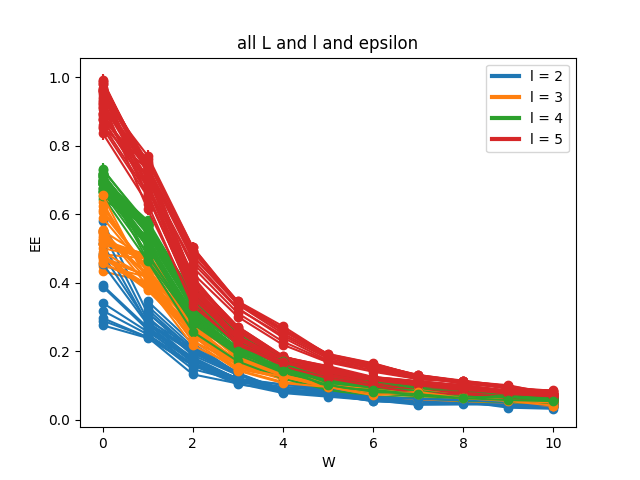

In [21]:
%matplotlib notebook
for ep in np.arange(11)/10:
    for L_idx, L in enumerate(L_list):
        for l_idx, l in enumerate(l_list):
            config = all_data[L_idx,l_idx,:,:,:,:]
            EE_list = []
            std_list = []
            for W_idx, W in enumerate(W_list):
                a = flatten_data(config[W_idx,:,:,:])
                try:
                    EEs = get_lists(np.array(get_ep_data(a, ep, tol = .5)))[EE_IDX]
                    EE_list.append(np.mean(EEs))
                    std_list.append(np.std(EEs)/np.sqrt(len(EEs)))
                except:
                    continue
            plt.errorbar(W_list, EE_list, std_list, fmt='C{}o-'.format(l_idx),label=r"L = {}, l = {}, $\epsilon$ = {}".format(L, l, ep))
plt.title("all L and l and epsilon")
plt.xlabel("W")
plt.ylabel("EE")

from matplotlib.lines import Line2D
lines = [Line2D([0], [0], color="C{}".format(l_idx), linewidth=3, linestyle='-') for l_idx in range(len(l_list))]
labels = ['l = {}'.format(l) for l in l_list]
plt.legend(lines, labels)
plt.show()


<IPython.core.display.Javascript object>


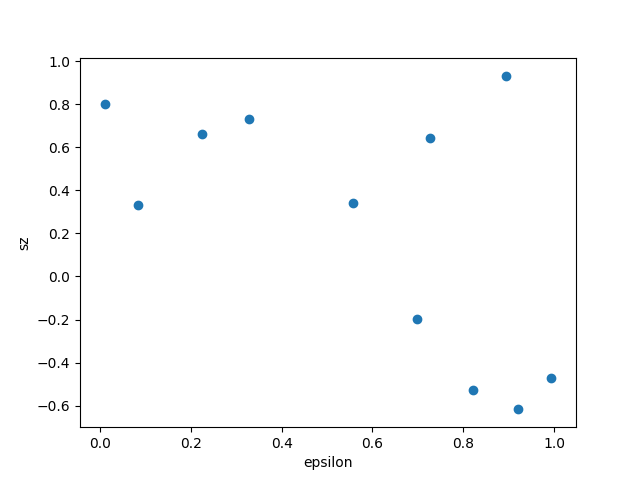

In [23]:
%matplotlib notebook
L_idx, l_idx, W_idx, dis = 1, 3, 1, 7
ep_data = get_lists(all_data[L_idx, l_idx, W_idx, dis,:,:].reshape(-1, all_data.shape[-1]))
sz_list = ep_data[SZ_IDX]
e_list = ep_data[EP_DMRG_IDX]

plt.scatter(e_list, sz_list)
plt.xlabel("epsilon")
plt.ylabel("sz")
plt.show()

In [43]:
%matplotlib notebook
l_idx = 3
L_idx = 2
for W_idx, W in enumerate(W_list):
    
    EE_list = []
    std_list = []
    e_list = np.arange(11)/10
    for ep in e_list:
        W = W_list[W_idx]
        W_arr = all_data[L_idx,l_idx,W_idx,:,:,:]
        W_arr = flatten_data(W_arr)
        EEs = get_lists(np.array(get_ep_data(W_arr, ep)))[EE_IDX]
        EE_list.append(np.mean(EEs))
        std_list.append(np.std(EEs)/np.sqrt(len(EEs)))

    plt.errorbar(e_list, EE_list, std_list)
plt.ylim(0,1)

IndexError: list index out of range

<IPython.core.display.Javascript object>


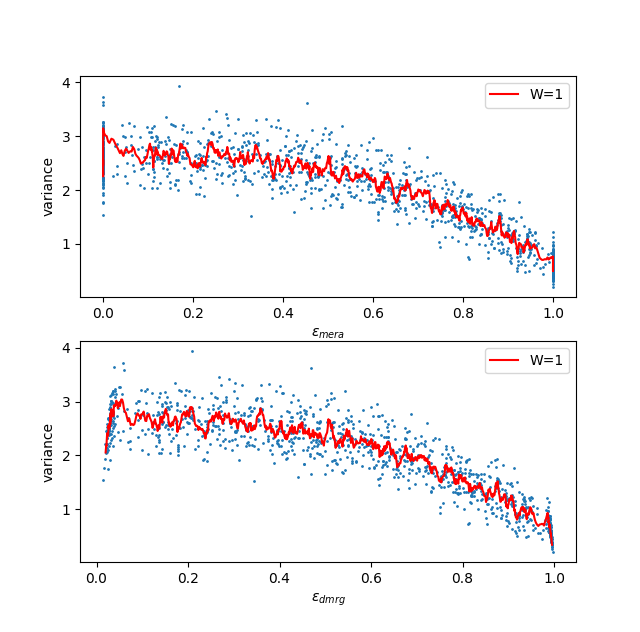

In [24]:
# plots for constant W
%matplotlib notebook
plt.subplot(2,1,1)
for W in [1]:
    W_data = all_data[W].reshape(num_dis*num_energies, num_params)
    pl = get_lists(W_data)
    plt.scatter(pl[5], pl[1], s = 1)
    srt_data = get_sorted_data(W_data, 5)
    x_list, y_list = srt_data[5], srt_data[1]
    plt.plot(smooth_data(x_list), smooth_data(y_list), 'r', label="W=1")
    plt.xlabel(r"$\epsilon_{mera}$")
    plt.ylabel("variance")
    plt.legend(loc="best")
plt.subplot(2,1,2)
for W in [1]:
    W_data = all_data[W].reshape(num_dis*num_energies, num_params)
    pl = get_lists(W_data)
    plt.scatter(pl[6], pl[1], s = 1)
    srt_data = get_sorted_data(W_data, 6)
    x_list, y_list = srt_data[6], srt_data[1]
    plt.plot(smooth_data(x_list), smooth_data(y_list), 'r', label="W=1")
    plt.xlabel(r"$\epsilon_{dmrg}$")
    plt.ylabel("variance")
    plt.legend(loc="best")
plt.show()

<IPython.core.display.Javascript object>


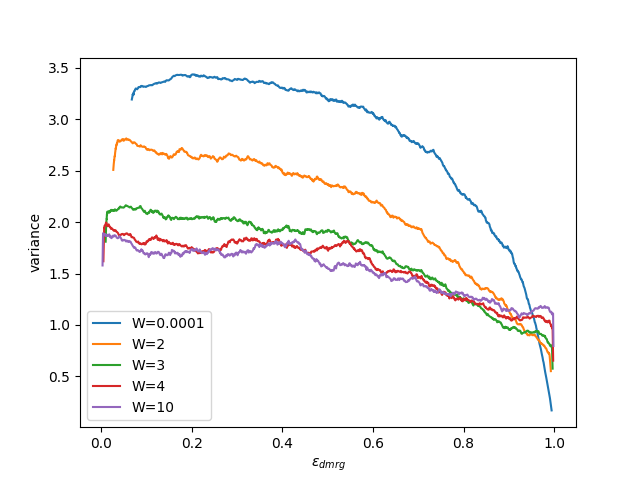

In [30]:
%matplotlib notebook
N = 70
for i, W in enumerate([0.0001, 2, 3, 4, 10]):
    W_data = all_data[i].reshape(num_dis*num_energies, num_params)
    srt_data = get_sorted_data(W_data, 6)
    x_list, y_list = srt_data[6], srt_data[1]
    plt.plot(smooth_data(x_list, N), smooth_data(y_list, N), label="W={}".format(W))

plt.xlabel(r"$\epsilon_{dmrg}$")
plt.ylabel("variance")
plt.legend(loc="best")
plt.show()

<IPython.core.display.Javascript object>


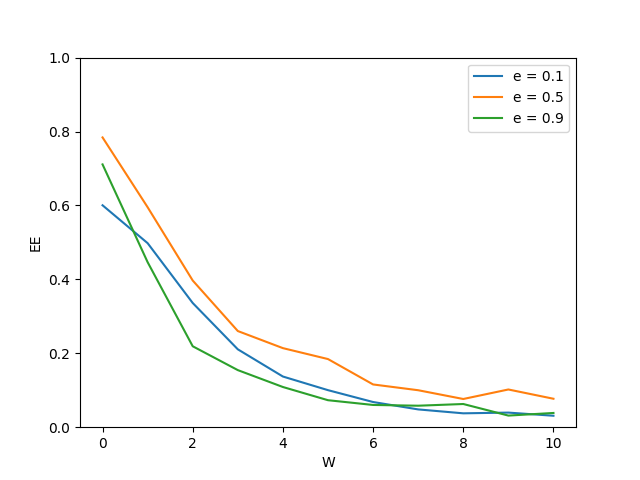

In [23]:
# plots for constant energy
%matplotlib notebook
for r in [0.1, 0.5, 0.9]:
    EE_mera = np.zeros(num_W)
    for dis in range(num_dis):
        e = int(round(r*(num_energies-1)))
        e_data = all_data[:,dis,e].reshape(num_W, num_params)
        EE_mera += np.array(e_data[:,2])
        w_list = e_data[:,7]
    EE_mera /= num_dis
    plt.plot(w_list, EE_mera, label="e = {}".format(r))
#plt.title("W = {}".format(W))
plt.xlabel("W")
plt.ylabel("EE")
plt.ylim(0,1)
plt.legend(loc='best')
plt.show()

In [36]:
# plots for constant energy
%matplotlib notebook
for r in [0.1, 0.5, 0.9]:
    EE_mera = np.zeros(num_W)
    for dis in range(num_dis):
        e = int(round(r*(num_energies-1)))
        e_data = all_data[:,dis,e].reshape(num_W, num_params)
        EE_mera += np.log(np.array(e_data[:,1]))
        w_list = e_data[:,7]
    EE_mera /= num_dis
    plt.plot(w_list, EE_mera, label="e = {}".format(r))
#plt.title("W = {}".format(W))
plt.xlabel("W")
plt.ylabel("log variance")
#plt.ylim(0,1)
plt.legend(loc='best')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


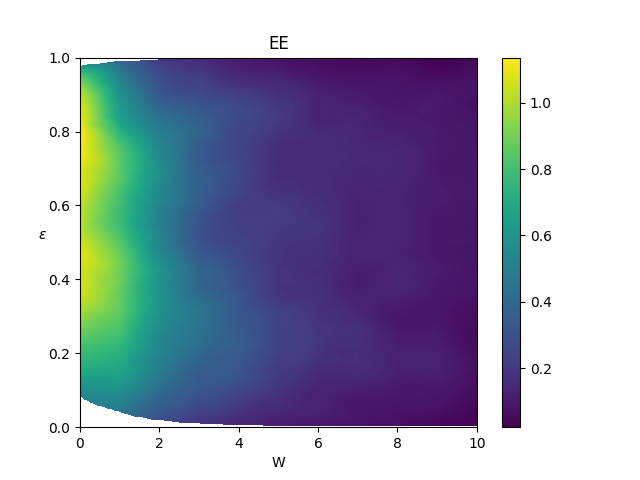

<IPython.core.display.Javascript object>


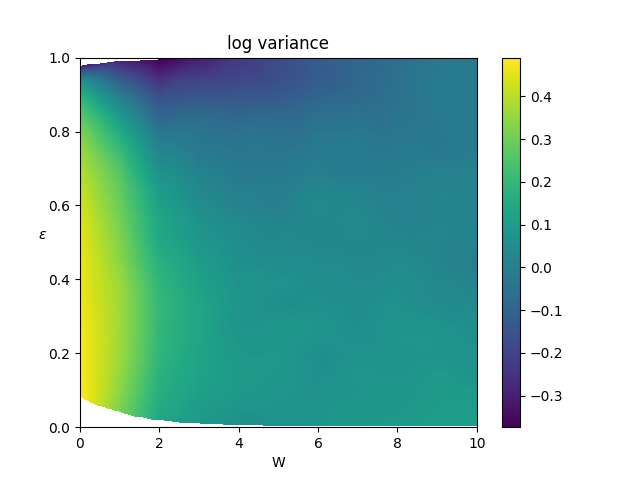

<IPython.core.display.Javascript object>


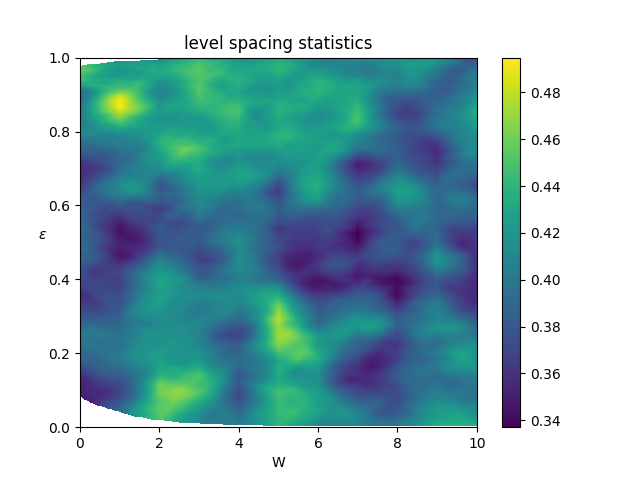

In [22]:
%matplotlib notebook
Nx, Ny = 500, 500
grid_x, grid_y = np.mgrid[0:10:Nx*1j, 0:1:Ny*1j]

EE_grid = np.zeros((Nx, Ny))
var_grid = np.zeros((Nx, Ny))
r_grid = np.zeros((Nx, Ny))

L_idx, l_idx = 2, 3
num_W, num_params = len(W_list), all_data.shape[-1]
for dis in range(num_dis):
    # E, var, EE, r, ep_mera, ep_dmrg, W, dis, e
    flattened_data = all_data[L_idx,l_idx,:,dis,:,:].reshape([num_W*num_energies, num_params])
    pl = get_lists(flattened_data)
    
    Wp_list  = pl[W_IDX]
    ep_list  = pl[EP_DMRG_IDX]
    EE_list  = pl[EE_IDX]
    var_list = pl[LOGVAR_IDX]
    r_list   = pl[R_IDX]
    
    EE_grid  += griddata(list(zip(Wp_list, ep_list)), EE_list,  (grid_x, grid_y), 'linear')
    var_grid += griddata(list(zip(Wp_list, ep_list)), var_list, (grid_x, grid_y), 'linear')
    r_grid   += griddata(list(zip(Wp_list, ep_list)), r_list,   (grid_x, grid_y), 'linear')

    #plt.scatter(W_list, ep_list, s=1)
grid_list = [EE_grid/num_dis, var_grid/num_dis, r_grid/num_dis]
#grid_list = [smooth_data2d(g, 3) for g in grid_list]

plt.figure()
plt.imshow(grid_list[0].T, extent=(0,10,0,1), origin='lower', aspect='auto')
plt.ylabel(r"$\varepsilon$", rotation=0)
plt.xlabel("W")
plt.title("EE")
plt.colorbar()

plt.figure()
plt.imshow(grid_list[1].T, extent=(0,10,0,1), origin='lower', aspect='auto')
plt.ylabel(r"$\varepsilon$", rotation=0)
plt.xlabel("W")
plt.title("log variance")
plt.colorbar()

plt.figure()
plt.imshow(grid_list[2].T, extent=(0,10,0,1), origin='lower', aspect='auto')
plt.ylabel(r"$\varepsilon$", rotation=0)
plt.xlabel("W")
plt.title("level spacing statistics")
plt.colorbar()
plt.show()


In [ ]:
flattened_data = all_data.reshape([-1, num_params])
list_arr = get_lists(flattened_data)
E_list, var_list, EE_list, r_list, ep_list, W_list = params_list[0], params_list[1], params_list[2], \
                                                     params_list[3], params_list[5], params_list[6]
x_list, y_list = list(zip(*sorted(zip(x_list, y_list))))
return np.array(x_list), np.array(y_list)

l = 2, 3, 4, 5, 6

L = 16, 32, 64, 128

EE vs W for various epsilon

variance vs L for various l

average Sz vs epsilon, where the average is over a bunch of energies near a given epsilon

geometry
